Arrythmia Detection from ECG signal using Convolution Neural Network

In [338]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Reading the MIT-BIH Arrhythmia Database

In [281]:
df_train=pd.read_csv("mitbih_train.csv")
df_test=pd.read_csv("mitbih_test.csv")

In [282]:
df_train.shape

(87553, 188)

In [283]:
df_test.shape

(21891, 188)

The number of samples in each class (0 - N, 1 - S, 2 - V, 3 - F, 4 - Q)

In [284]:
df_train.iloc[:,187].value_counts()

0.0    72470
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 0.000000000000000000e+00.88, dtype: int64

Displaying one sample ECG waveform

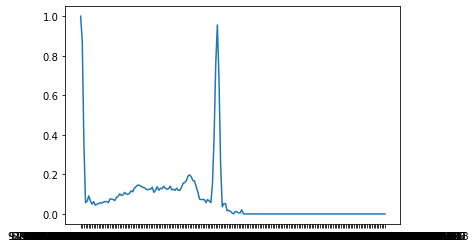

In [300]:
plt.plot(df_train.iloc[15])

Getting the training and testing samples

In [286]:
X_train=df_train.iloc[:,:186].values
y_tr=df_train.iloc[:,187].values
X_test=df_test.iloc[:,:186].values
y_te=df_test.iloc[:,187].values
y_train=to_categorical(y_tr)
y_test=to_categorical(y_te)
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

In [287]:
X_train.shape

(87553, 186, 1)

In [288]:
X_test.shape

(21891, 186, 1)

In [289]:
y_train.shape

(87553, 5)

In [290]:
y_test.shape

(21891, 5)

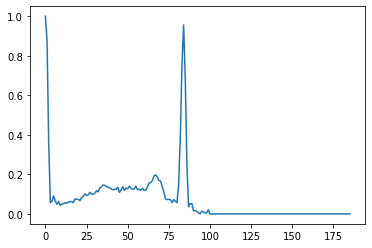

In [291]:
plt.plot(X_train[15])

Importing the libraries for implementing a CNN

In [292]:
import keras
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from tensorflow.keras.layers import BatchNormalization
from keras.utils.np_utils import to_categorical

In [296]:
def network(X_train,y_train,X_test,y_test):
    
    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    flatten=Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)
    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    history=model.fit(X_train, y_train,epochs=20, batch_size=32,validation_data=(X_test,y_test))
    model.load_weights('best_model.h5')
    return(model,history)

In [302]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']   
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    

In [298]:
model,history=network(X_train,y_train,X_test,y_test)

Epoch 1/20
2737/2737 [==============================] - 49s 17ms/step - loss: 0.1280 - accuracy: 0.9644 - val_loss: 0.1781 - val_accuracy: 0.9500
Epoch 2/20
2737/2737 [==============================] - 43s 16ms/step - loss: 0.0743 - accuracy: 0.9788 - val_loss: 0.0795 - val_accuracy: 0.9789
Epoch 3/20
2737/2737 [==============================] - 41s 15ms/step - loss: 0.0583 - accuracy: 0.9823 - val_loss: 0.0768 - val_accuracy: 0.9807
Epoch 4/20
2737/2737 [==============================] - 42s 15ms/step - loss: 0.0471 - accuracy: 0.9860 - val_loss: 0.0670 - val_accuracy: 0.9832
Epoch 5/20
2737/2737 [==============================] - 41s 15ms/step - loss: 0.0397 - accuracy: 0.9880 - val_loss: 0.0987 - val_accuracy: 0.9771
Epoch 6/20
2737/2737 [==============================] - 43s 16ms/step - loss: 0.0331 - accuracy: 0.9893 - val_loss: 0.0645 - val_accuracy: 0.9847
Epoch 7/20
2737/2737 [==============================] - 41s 15ms/step - loss: 0.0300 - accuracy: 0.9903 - val_loss: 0.0726 -

Model Evaluation

685/685 [==============================] - 4s 5ms/step - loss: 0.1126 - accuracy: 0.9655
Accuracy: 96.55%


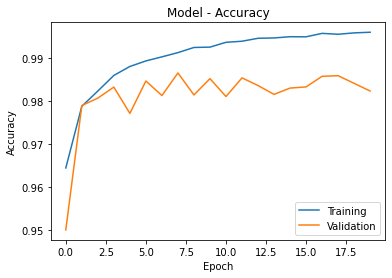

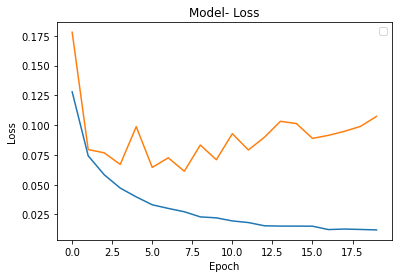

685/685 [==============================] - 4s 5ms/step


In [303]:
evaluate_model(history,X_test,y_test,model)
y_pred=model.predict(X_test)

Viewing the Actual and Predicted values

In [304]:
y_true=[]
for element in y_test:
    y_true.append(np.argmax(element))
print(y_true)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [305]:
ypred=[]
for element in y_pred:
    ypred.append(np.argmax(element))
print(ypred)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 

In [359]:
yt=[]
for i in range(len(y_true)):
    if y_true[i]==0:
        yt.append("[0] N")
    elif y_true[i]==1:
        yt.append("[1] S")
    elif y_true[i]==2:
        yt.append("[2] V")
    elif y_true[i]==3:
        yt.append("[3] F")
    elif y_true[i]==4:
        yt.append("[4] Q")

In [360]:
yp=[]
for i in range(len(ypred)):
    if ypred[i]==0:
        yp.append("[0] N")
    elif ypred[i]==1:
        yp.append("[1] S")
    elif ypred[i]==2:
        yp.append("[2] V")
    elif ypred[i]==3:
        yp.append("[3] F")
    elif ypred[i]==4:
        yp.append("[4] Q")

Classification Report

In [361]:
print(classification_report(yt,yp))

              precision    recall  f1-score   support

       [0] N       0.99      0.97      0.98     18117
       [1] S       0.60      0.87      0.71       556
       [2] V       0.90      0.96      0.93      1448
       [3] F       0.54      0.91      0.68       162
       [4] Q       0.97      0.99      0.98      1608

    accuracy                           0.97     21891
   macro avg       0.80      0.94      0.85     21891
weighted avg       0.97      0.97      0.97     21891



Confusion Matrix

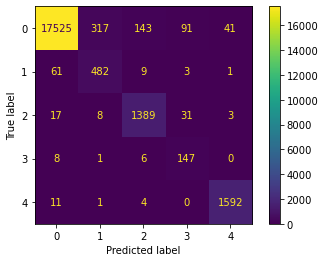

In [366]:
cm=confusion_matrix(yt,yp)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()